### Confirm Tensorflow Installation

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


In [2]:
#import os
#os.environ["CUDA_VISIBLE_DEVICES"]='0'
#tf.test.is_built_with_cuda()
#tf.test.is_built_with_gpu_support()
#tf.config.list_physical_devices('GPU')

### Importing the necessary modules

In [3]:
import numpy as np
import os
from os import listdir 
from os.path import isfile, join
import cv2

import tensorflow as tf
import tensorflow.keras as keras


### Loading and Preprocessing

In [4]:
#Data visiting – os.walk()

label_folder = []
total_size = 0
data_path = r"D:\CIFAR10_Test Image\Training_data"

#os.walk() generates the file names(dirpath, dirnames, filenames) 
#in a directory tree by walking the tree either top-down or bottom-up.
for root, dirts, files in os.walk(data_path): 
    for dirt in dirts:
        label_folder.append(dirt)
    total_size += len(files)

    
print("found",total_size,"files.")
print("folder:",label_folder)

found 25000 files.
folder: ['0', '1', '2', '3', '4']


In [5]:
#Load image

base_x_train = []
base_y_train = []

for i in range(len(label_folder)):
    labelPath = data_path+r'\\'+label_folder[i]
    
    #listdir() returns a list containing the names of the entries in the directory given by path.
    #isfile() is used to check whether the specified path is an existing regular file or not.
    FileName = [f for f in listdir(labelPath) if isfile(join(labelPath, f))]
    
    for j in range(len(FileName)):
        path = labelPath+r'\\'+FileName[j]
        
        #use cv2.imread read image.
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        
        base_x_train.append(img)
        base_y_train.append(label_folder[i])


print(np.array(base_x_train).shape)
print(np.array(base_y_train).shape)
        

(25000, 32, 32, 3)
(25000,)


In [6]:
from tensorflow.keras.utils import to_categorical

#Convert a category vector to a binary (0 or 1) matrix-type representation

base_y_train = to_categorical(base_y_train)


print(np.array(base_x_train).shape)
print(np.array(base_y_train).shape)
        

(25000, 32, 32, 3)
(25000, 5)


### Splitting the Data into training and validation data

In [7]:
# Split into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split( \
    np.array(base_x_train), np.array(base_y_train), test_size=0.2, random_state = 0)

print("Training data:", x_train.shape, y_train.shape)
print("Validation data:", x_valid.shape, y_valid.shape)

Training data: (20000, 32, 32, 3) (20000, 5)
Validation data: (5000, 32, 32, 3) (5000, 5)


### Show the image

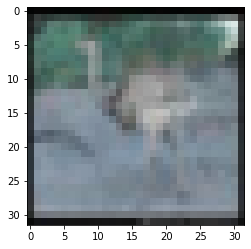

Answer: 2
Answer(one-hot): [0. 0. 1. 0. 0.]


In [8]:
import random
import matplotlib.pyplot as plt

idx = random.randint(0, x_train.shape[0])
plt.imshow(x_train[idx])
plt.show()

print("Answer:", np.argmax(y_train[idx]))
print("Answer(one-hot):", y_train[idx])

### Build the network

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='softmax')
])

### Training the network

In [10]:
epoch = 10
batch_size = 50

model.compile(
    loss="categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"]
)
history = model.fit(
    x_train, 
    y_train, 
    epochs=epoch, 
    batch_size=batch_size,
    validation_data=(x_valid, y_valid)
)

Epoch 1/10
400/400 [==============================] - 59s 118ms/step - loss: 1.4054 - accuracy: 0.4288 - val_loss: 1.2394 - val_accuracy: 0.5368
Epoch 2/10
400/400 [==============================] - 50s 126ms/step - loss: 1.1493 - accuracy: 0.5542 - val_loss: 1.1008 - val_accuracy: 0.5556
Epoch 3/10
400/400 [==============================] - 50s 125ms/step - loss: 0.9960 - accuracy: 0.6149 - val_loss: 0.9931 - val_accuracy: 0.6160
Epoch 4/10
400/400 [==============================] - 50s 125ms/step - loss: 0.8860 - accuracy: 0.6626 - val_loss: 0.8966 - val_accuracy: 0.6566
Epoch 5/10
400/400 [==============================] - 50s 126ms/step - loss: 0.8034 - accuracy: 0.6959 - val_loss: 0.8060 - val_accuracy: 0.6954
Epoch 6/10
400/400 [==============================] - 50s 124ms/step - loss: 0.7351 - accuracy: 0.7222 - val_loss: 0.8083 - val_accuracy: 0.6876
Epoch 7/10
400/400 [==============================] - 47s 118ms/step - loss: 0.6688 - accuracy: 0.7508 - val_loss: 0.7474 - val_ac

In [11]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [12]:
epoch = 10
batch_size = 50

model2.compile(
    loss="categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"]
)
history = model2.fit(
    x_train, 
    y_train, 
    epochs=epoch, 
    batch_size=batch_size,
    validation_data=(x_valid, y_valid)
)

Epoch 1/10
400/400 [==============================] - 46s 113ms/step - loss: 1.4504 - accuracy: 0.4072 - val_loss: 1.2915 - val_accuracy: 0.4636
Epoch 2/10
400/400 [==============================] - 45s 113ms/step - loss: 1.0294 - accuracy: 0.5842 - val_loss: 1.0354 - val_accuracy: 0.5748
Epoch 3/10
400/400 [==============================] - 45s 113ms/step - loss: 0.8796 - accuracy: 0.6532 - val_loss: 0.8075 - val_accuracy: 0.6916
Epoch 4/10
400/400 [==============================] - 46s 114ms/step - loss: 0.7645 - accuracy: 0.7039 - val_loss: 0.8339 - val_accuracy: 0.6662
Epoch 5/10
400/400 [==============================] - 46s 114ms/step - loss: 0.6645 - accuracy: 0.7474 - val_loss: 0.7509 - val_accuracy: 0.7104
Epoch 6/10
400/400 [==============================] - 46s 114ms/step - loss: 0.5791 - accuracy: 0.7827 - val_loss: 0.7218 - val_accuracy: 0.7356
Epoch 7/10
400/400 [==============================] - 46s 114ms/step - loss: 0.4992 - accuracy: 0.8142 - val_loss: 0.7554 - val_ac

In [13]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='softmax'),
    tf.keras.layers.Dense(128, activation='softmax'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [14]:
epoch = 10
batch_size = 50

model3.compile(
    loss="categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"]
)
history = model3.fit(
    x_train, 
    y_train, 
    epochs=epoch, 
    batch_size=batch_size,
    validation_data=(x_valid, y_valid)
)

Epoch 1/10
400/400 [==============================] - 48s 116ms/step - loss: 1.6095 - accuracy: 0.1988 - val_loss: 1.6095 - val_accuracy: 0.1934
Epoch 2/10
400/400 [==============================] - 45s 114ms/step - loss: 1.6094 - accuracy: 0.2012 - val_loss: 1.6094 - val_accuracy: 0.1934
Epoch 3/10
400/400 [==============================] - 46s 114ms/step - loss: 1.6093 - accuracy: 0.2012 - val_loss: 1.6094 - val_accuracy: 0.1934
Epoch 4/10
400/400 [==============================] - 46s 114ms/step - loss: 1.6093 - accuracy: 0.2018 - val_loss: 1.6094 - val_accuracy: 0.2020
Epoch 5/10
400/400 [==============================] - 46s 115ms/step - loss: 1.6093 - accuracy: 0.2024 - val_loss: 1.6094 - val_accuracy: 0.1940
Epoch 6/10
400/400 [==============================] - 46s 114ms/step - loss: 1.6093 - accuracy: 0.2030 - val_loss: 1.6093 - val_accuracy: 0.2286
Epoch 7/10
400/400 [==============================] - 47s 117ms/step - loss: 1.6093 - accuracy: 0.2127 - val_loss: 1.6094 - val_ac

In [15]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [16]:
epoch = 10
batch_size = 50

model4.compile(
    loss="categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"]
)
history = model4.fit(
    x_train, 
    y_train, 
    epochs=epoch, 
    batch_size=batch_size,
    validation_data=(x_valid, y_valid)
)

Epoch 1/10
400/400 [==============================] - 46s 113ms/step - loss: 1.6189 - accuracy: 0.2010 - val_loss: 1.6294 - val_accuracy: 0.2040
Epoch 2/10
400/400 [==============================] - 45s 113ms/step - loss: 1.6161 - accuracy: 0.1996 - val_loss: 1.6151 - val_accuracy: 0.1962
Epoch 3/10
400/400 [==============================] - 45s 112ms/step - loss: 1.6167 - accuracy: 0.1963 - val_loss: 1.6139 - val_accuracy: 0.2044
Epoch 4/10
400/400 [==============================] - 45s 112ms/step - loss: 1.6147 - accuracy: 0.2036 - val_loss: 1.6127 - val_accuracy: 0.1962
Epoch 5/10
400/400 [==============================] - 45s 112ms/step - loss: 1.6155 - accuracy: 0.2029 - val_loss: 1.6148 - val_accuracy: 0.2036
Epoch 6/10
400/400 [==============================] - 45s 111ms/step - loss: 1.6153 - accuracy: 0.2056 - val_loss: 1.6209 - val_accuracy: 0.2038
Epoch 7/10
400/400 [==============================] - 44s 111ms/step - loss: 1.6152 - accuracy: 0.2018 - val_loss: 1.6140 - val_ac

In [17]:
model5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='sigmoid')
])

In [18]:
epoch = 10
batch_size = 50

model5.compile(
    loss="categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"]
)
history = model5.fit(
    x_train, 
    y_train, 
    epochs=epoch, 
    batch_size=batch_size,
    validation_data=(x_valid, y_valid)
)

Epoch 1/10
400/400 [==============================] - 44s 110ms/step - loss: 1.4192 - accuracy: 0.4236 - val_loss: 1.2249 - val_accuracy: 0.5536
Epoch 2/10
400/400 [==============================] - 50s 126ms/step - loss: 1.1578 - accuracy: 0.5572 - val_loss: 1.0715 - val_accuracy: 0.5706
Epoch 3/10
400/400 [==============================] - 50s 125ms/step - loss: 1.0013 - accuracy: 0.6172 - val_loss: 0.9554 - val_accuracy: 0.6386
Epoch 4/10
400/400 [==============================] - 50s 125ms/step - loss: 0.8846 - accuracy: 0.6650 - val_loss: 0.8479 - val_accuracy: 0.6824
Epoch 5/10
400/400 [==============================] - 49s 122ms/step - loss: 0.7972 - accuracy: 0.6997 - val_loss: 0.8468 - val_accuracy: 0.6838
Epoch 6/10
400/400 [==============================] - 47s 117ms/step - loss: 0.7177 - accuracy: 0.7333 - val_loss: 0.9565 - val_accuracy: 0.6238
Epoch 7/10
400/400 [==============================] - 46s 114ms/step - loss: 0.6509 - accuracy: 0.7610 - val_loss: 0.6958 - val_ac

In [19]:
model6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='tanh')
])

In [20]:
epoch = 10
batch_size = 50

model6.compile(
    loss="categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"]
)
history = model6.fit(
    x_train, 
    y_train, 
    epochs=epoch, 
    batch_size=batch_size,
    validation_data=(x_valid, y_valid)
)

Epoch 1/10
400/400 [==============================] - 47s 116ms/step - loss: 6.2271 - accuracy: 0.2017 - val_loss: 6.4505 - val_accuracy: 0.1962
Epoch 2/10
400/400 [==============================] - 46s 115ms/step - loss: 6.4464 - accuracy: 0.2009 - val_loss: 6.4505 - val_accuracy: 0.1962
Epoch 3/10
400/400 [==============================] - 46s 115ms/step - loss: 6.4464 - accuracy: 0.2009 - val_loss: 6.4505 - val_accuracy: 0.1962
Epoch 4/10
400/400 [==============================] - 46s 115ms/step - loss: 6.4464 - accuracy: 0.2009 - val_loss: 6.4505 - val_accuracy: 0.1962
Epoch 5/10
400/400 [==============================] - 46s 115ms/step - loss: 6.4464 - accuracy: 0.2009 - val_loss: 6.4505 - val_accuracy: 0.1962
Epoch 6/10
400/400 [==============================] - 46s 115ms/step - loss: 6.4464 - accuracy: 0.2009 - val_loss: 6.4505 - val_accuracy: 0.1962
Epoch 7/10
400/400 [==============================] - 46s 116ms/step - loss: 6.4464 - accuracy: 0.2009 - val_loss: 6.4505 - val_ac

In [21]:
model7 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu')
])

In [22]:
epoch = 10
batch_size = 50

model7.compile(
    loss="categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"]
)
history = model7.fit(
    x_train, 
    y_train, 
    epochs=epoch, 
    batch_size=batch_size,
    validation_data=(x_valid, y_valid)
)

Epoch 1/10
400/400 [==============================] - 47s 112ms/step - loss: 4.3181 - accuracy: 0.2512 - val_loss: 4.3589 - val_accuracy: 0.2830
Epoch 2/10
400/400 [==============================] - 50s 125ms/step - loss: 4.2836 - accuracy: 0.2835 - val_loss: 4.2641 - val_accuracy: 0.3470
Epoch 3/10
400/400 [==============================] - 50s 125ms/step - loss: 2.2633 - accuracy: 0.2282 - val_loss: 1.6444 - val_accuracy: 0.2028
Epoch 4/10
400/400 [==============================] - 50s 126ms/step - loss: 1.6172 - accuracy: 0.2046 - val_loss: 1.6083 - val_accuracy: 0.2176
Epoch 5/10
400/400 [==============================] - 50s 126ms/step - loss: 1.6078 - accuracy: 0.2212 - val_loss: 1.6073 - val_accuracy: 0.2200
Epoch 6/10
400/400 [==============================] - 47s 119ms/step - loss: 1.6068 - accuracy: 0.2353 - val_loss: 1.6061 - val_accuracy: 0.2374
Epoch 7/10
400/400 [==============================] - 47s 119ms/step - loss: 1.6053 - accuracy: 0.2451 - val_loss: 1.6042 - val_ac

### Saving the trained weights

In [25]:
model.save("my_model0501.hdf5")

In [26]:
from tensorflow.keras.models import load_model
model2 = load_model("my_model0501.hdf5")

In [27]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [28]:
y_hat = model2.predict(x_valid)

In [29]:
# 將output改為標籤
output_y = np.zeros(y_hat.shape[0])

for i in range(y_hat.shape[0]):
    for j in range(y_hat.shape[1]):
        if y_hat[i, j] >= max(y_hat[i, ]):
            output_y[i] = j

output_y

array([2., 0., 4., ..., 4., 1., 1.])

In [30]:
output_yv = np.zeros(y_valid.shape[0])

for i in range(y_valid.shape[0]):
    for j in range(y_valid.shape[1]):
        if y_valid[i, j] >= max(y_valid[i, ]):
            output_yv[i] = j

output_yv

array([2., 1., 4., ..., 0., 1., 1.])

In [31]:
sum(output_y == output_yv) / len(output_y)

0.8332